In [43]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from datetime import datetime
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
df = pd.read_csv('telegram_channel_messages.csv')
df.head()

,Date,Message,Message_ID,Views,Forwards,Reactions
0,2024-12-07 06:11:51+00:00,**__CDSL__** : Stock is up by 3️⃣0️⃣0️⃣🔣 done ...,129070,4683.0,0.0,NaN
1,2024-12-06 12:32:30+00:00,**Stock Phoenix Volume Breakout Strategy**: He...,129062,5558.0,4.0,NaN
2,2024-12-06 10:19:30+00:00,**Important Announcement from Stock Phoenix - ...,129060,5457.0,2.0,NaN
3,2024-12-06 10:19:13+00:00,Good Closing for the day - Looking forward for...,129059,4919.0,0.0,NaN
4,2024-12-06 10:18:52+00:00,NaN,129058,4871.0,0.0,NaN


In [4]:
df.isnull().sum()

Date              0
Message       16718
Message_ID        0
Views            53
Forwards         53
Reactions     50000
dtype: int64

In [5]:
df = df.drop('Reactions', axis=1)
df = df.dropna()
df.isnull().sum()

Date          0
Message       0
Message_ID    0
Views         0
Forwards      0
dtype: int64

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [8]:
df['Cleaned_Message'] = df['Message'].apply(preprocess_text)

In [9]:
df['Sentiment'] = df['Cleaned_Message'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [10]:
df = df.drop('Message', axis=1)
df.head()

,Date,Message_ID,Views,Forwards,Cleaned_Message,Sentiment
0,2024-12-07 06:11:51+00:00,129070,4683.0,0.0,cdsl stock done form analysed level stock stil...,0.0000
1,2024-12-06 12:32:30+00:00,129062,5558.0,4.0,stock phoenix volume breakout strategy day vol...,0.3182
2,2024-12-06 10:19:30+00:00,129060,5457.0,2.0,important announcement stock phoenix mentorshi...,0.5178
3,2024-12-06 10:19:13+00:00,129059,4919.0,0.0,good closing day looking forward one wonderful...,0.7650
18,2024-12-06 08:47:40+00:00,129044,5287.0,4.0,bajaj healthcare look breakout counter stock b...,0.0000


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df.head()

,Date,Message_ID,Views,Forwards,Cleaned_Message,Sentiment
0,2024-12-07,129070,4683.0,0.0,cdsl stock done form analysed level stock stil...,0.0000
1,2024-12-06,129062,5558.0,4.0,stock phoenix volume breakout strategy day vol...,0.3182
2,2024-12-06,129060,5457.0,2.0,important announcement stock phoenix mentorshi...,0.5178
3,2024-12-06,129059,4919.0,0.0,good closing day looking forward one wonderful...,0.7650
18,2024-12-06,129044,5287.0,4.0,bajaj healthcare look breakout counter stock b...,0.0000


In [12]:
def sentiment_category(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [13]:
df['Sentiment_Category'] = df['Sentiment'].apply(sentiment_category)

In [14]:
# Feature: Word count
df['Word_Count'] = df['Cleaned_Message'].apply(lambda x: len(x.split()))

In [15]:
df.head()

,Date,Message_ID,Views,Forwards,Cleaned_Message,Sentiment,Sentiment_Category,Word_Count
0,2024-12-07,129070,4683.0,0.0,cdsl stock done form analysed level stock stil...,0.0000,Neutral,10
1,2024-12-06,129062,5558.0,4.0,stock phoenix volume breakout strategy day vol...,0.3182,Positive,17
2,2024-12-06,129060,5457.0,2.0,important announcement stock phoenix mentorshi...,0.5178,Positive,45
3,2024-12-06,129059,4919.0,0.0,good closing day looking forward one wonderful...,0.7650,Positive,9
18,2024-12-06,129044,5287.0,4.0,bajaj healthcare look breakout counter stock b...,0.0000,Neutral,8


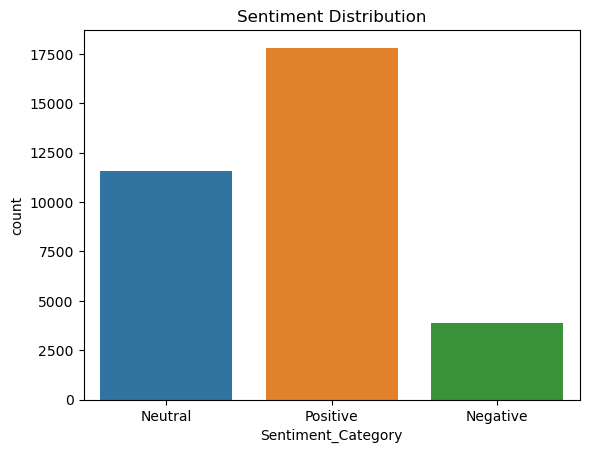

In [16]:
sns.countplot(data=df, x='Sentiment_Category')
plt.title('Sentiment Distribution');

In [17]:
all_text = ' '.join(df['Cleaned_Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(all_text)

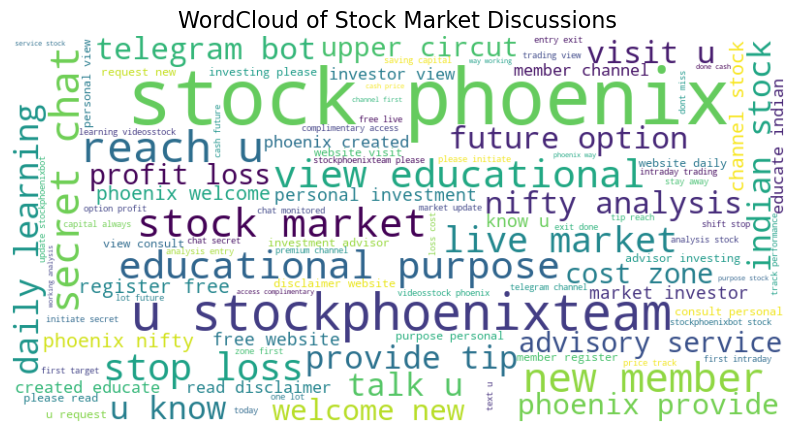

In [18]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Stock Market Discussions', fontsize=16);

In [19]:
# Define the date to split
split_date = pd.to_datetime('2024-01-01').date()

In [20]:
train_df = df[df['Date'] < split_date]
test_df = df[df['Date'] >= split_date]

print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 26255
Test set size: 7027


In [21]:
vectorizer = TfidfVectorizer(max_features=1000)

# Implementing Bag of Words
X_train = vectorizer.fit_transform(train_df['Cleaned_Message']).toarray()
X_test = vectorizer.transform(test_df['Cleaned_Message']).toarray()

# The target variable
y_train = train_df['Sentiment_Category']
y_test = test_df['Sentiment_Category']

## Model 0 (RandomForestClassifier)

In [22]:
model_0 = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=42)
model_0.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)

In [23]:
feature_importances = model_0.feature_importances_
feature_names = vectorizer.get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

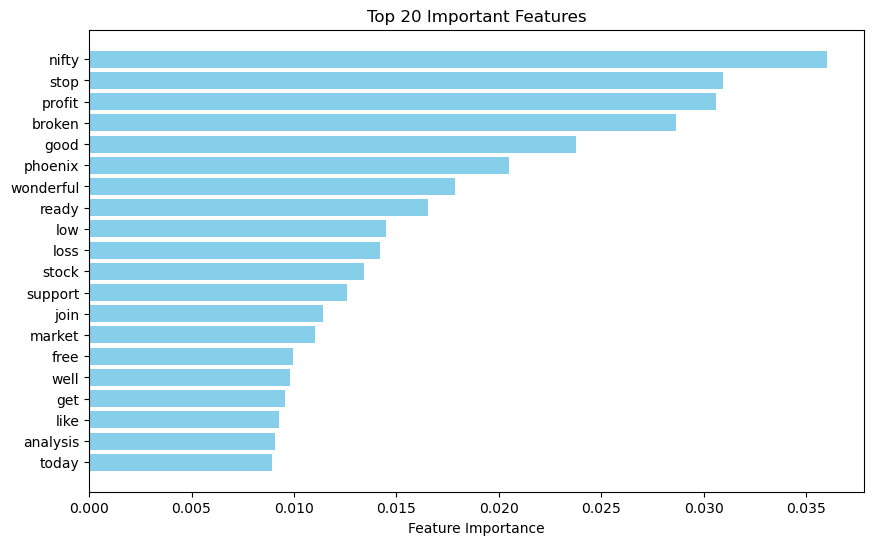

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis();

In [25]:
y_pred_0 = model_0.predict(X_test)

In [26]:
# Evaluate model performance
print("Accuracy on test set:", accuracy_score(y_test, y_pred_0))
print("Classification Report:")
print(classification_report(y_test, y_pred_0))

Accuracy on test set: 0.9271381813006974
Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.83      0.88      1096
     Neutral       0.90      0.97      0.93      2635
    Positive       0.95      0.93      0.94      3296

    accuracy                           0.93      7027
   macro avg       0.93      0.91      0.92      7027
weighted avg       0.93      0.93      0.93      7027



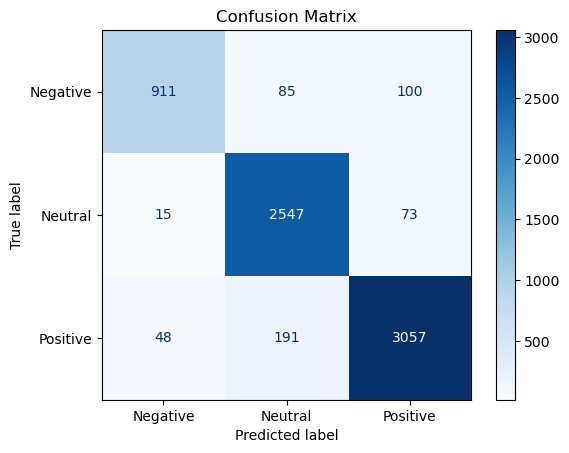

In [27]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_0, labels=model_0.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_0.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix');

## Model 1 (Multinomial Naive Bayes)

In [28]:
model_1 = MultinomialNB()
model_1.fit(X_train, y_train)

MultinomialNB()

In [29]:
y_pred_1 = model_1.predict(X_test)

In [30]:
# Evaluate model performance
print("Accuracy on test set:", accuracy_score(y_test, y_pred_1))
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

Accuracy on test set: 0.7562259854845595
Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.59      0.72      1096
     Neutral       0.71      0.76      0.73      2635
    Positive       0.77      0.81      0.79      3296

    accuracy                           0.76      7027
   macro avg       0.79      0.72      0.74      7027
weighted avg       0.76      0.76      0.76      7027



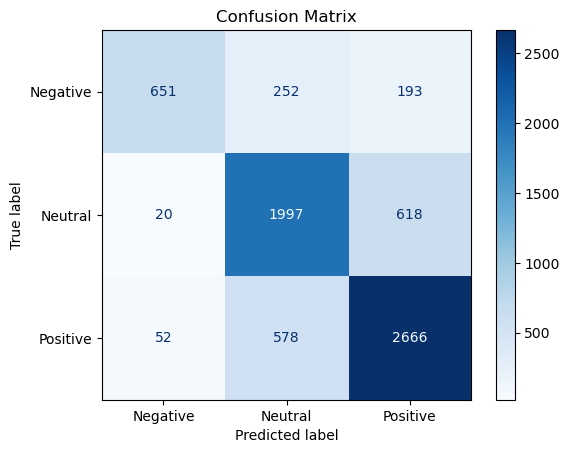

In [31]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_1, labels=model_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_1.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix');

## Model 2 (SVC)

In [32]:
model_2 = SVC(kernel='linear', random_state=42)
model_2.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [33]:
y_pred_2 = model_2.predict(X_test)

In [34]:
# Evaluate model performance
print("Accuracy on test set:", accuracy_score(y_test, y_pred_2))
print("Classification Report:")
print(classification_report(y_test, y_pred_2))

Accuracy on test set: 0.9489113419666999
Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.87      0.91      1096
     Neutral       0.93      0.99      0.95      2635
    Positive       0.97      0.94      0.96      3296

    accuracy                           0.95      7027
   macro avg       0.95      0.93      0.94      7027
weighted avg       0.95      0.95      0.95      7027



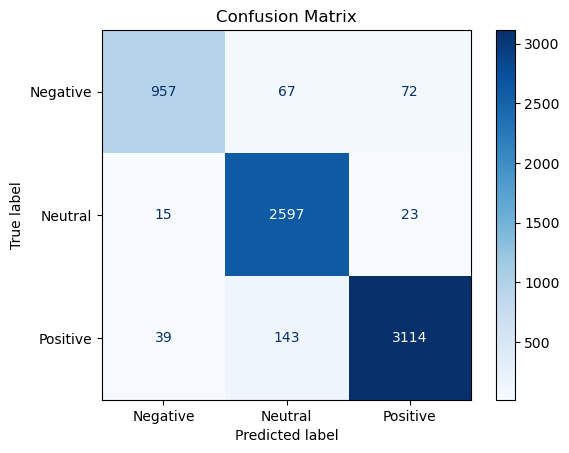

In [35]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_2, labels=model_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_2.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix');

## Model 3 (Logistic Regression)

In [36]:
model_3 = LogisticRegression(max_iter=1000, random_state=42)
model_3.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [37]:
y_pred_3 = model_3.predict(X_test)

In [38]:
# Evaluate model performance
print("Accuracy on test set:", accuracy_score(y_test, y_pred_3))
print("Classification Report:")
print(classification_report(y_test, y_pred_3))

Accuracy on test set: 0.9342535932830511
Classification Report:
              precision    recall  f1-score   support

    Negative       0.96      0.82      0.88      1096
     Neutral       0.91      0.97      0.94      2635
    Positive       0.95      0.94      0.95      3296

    accuracy                           0.93      7027
   macro avg       0.94      0.91      0.92      7027
weighted avg       0.94      0.93      0.93      7027



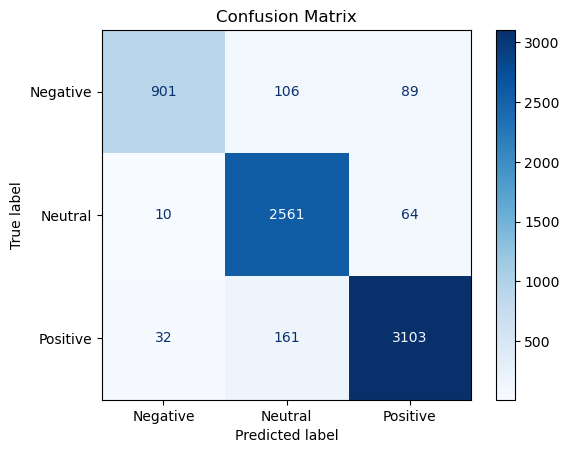

In [39]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_3, labels=model_3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_3.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix');

## Storing results in a single dataframe

In [42]:
results = {
    'Model': ['Random Forest Classifier', 'Multinomial Naive Bayes', 'SVC', 'Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred_0), accuracy_score(y_test, y_pred_1), accuracy_score(y_test, y_pred_2), accuracy_score(y_test, y_pred_3)],
}
results = pd.DataFrame(results)
results

,Model,Accuracy
0,Random Forest Classifier,0.927138
1,Multinomial Naive Bayes,0.756226
2,SVC,0.948911
3,Logistic Regression,0.934254
